# Modeling a Customer’s Propensity to Join our Loyalty Program

# by Tate Kennedy

## Necessary Imports

In [116]:
# Standard imports.
import pandas as pd
import numpy as np

# Visualization.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Statistics/mathematics.
import scipy.stats as stats
from collections import Counter
import math

# Dimensionality reduction.
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Model evaluation.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Models.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Loading the data set.
customers = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv', encoding='utf-8')

In [4]:
# Quick preview to confirm dataset loaded correctly.
customers.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False


In [6]:
# Exploering the dataframe created further.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 7 columns):
Unnamed: 0               120000 non-null int64
purch_amt                120000 non-null float64
gender                   120000 non-null object
card_on_file             120000 non-null object
age                      120000 non-null float64
days_since_last_purch    120000 non-null float64
loyalty                  120000 non-null bool
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 5.6+ MB


There are 120,000 sample included in this dataset for modeling purposes.

There are a total of 7 columns and there appears to be no missing values.

In [8]:
# Further confirmation of no missingness in dataset.
customers.isnull().sum()

Unnamed: 0               0
purch_amt                0
gender                   0
card_on_file             0
age                      0
days_since_last_purch    0
loyalty                  0
dtype: int64

In [9]:
# Descriptive statistics to further review the data used and determine if I have any potential problems.
customers.describe(include='all')

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
count,120000.000000,120000.000000,120000,120000,120000.000000,120000.000000,120000
unique,NaN,NaN,2,2,NaN,NaN,2
top,NaN,NaN,male,yes,NaN,NaN,False
freq,NaN,NaN,60181,60087,NaN,NaN,100000
mean,59999.500000,44.036234,NaN,NaN,25.803008,56.605908,NaN
std,34641.160489,20.473148,NaN,NaN,10.153072,16.422187,NaN
min,0.000000,-43.950000,NaN,NaN,-22.000000,-9.000000,NaN
25%,29999.750000,30.210000,NaN,NaN,19.000000,45.000000,NaN
50%,59999.500000,43.970000,NaN,NaN,26.000000,57.000000,NaN
75%,89999.250000,57.830000,NaN,NaN,33.000000,68.000000,NaN


The 'Unnamed: 0' field looks like it was intended to potentially be an index column, it will be dropped from the dataset as it will not be useful for modeling purposes (explaining the variance in our outcome of interest).

'gender' and 'card_on_file' are categorical variables that I will binarize into numerical features for modeling purposes.

'loaylty' is also a categorical variable and is also our outcome of interest or dependent variable. I will also convert this variable into a binary feature but want to perform some initial data exploration as is.

Initial review does not seem to indicate any potential problems in the results, for example, no signs of significant outliers.

In [10]:
# Removing unnecessary variables from dataset.
customers.drop(['Unnamed: 0'], 1, inplace=True)

customers.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False


In [13]:
# Before binarizing the categorical independent variables, looking to see if any class imbalance exist.
print(Counter(customers['gender']))
        
print(Counter(customers['card_on_file']))

Counter({'male': 60181, 'female': 59819})
Counter({'yes': 60087, 'no': 59913})


Both variables have a relatively even split between the two possible values.

In [14]:
# Encoding the categorical 'gender' data.
customers['gender'] = customers['gender'].replace(['female'], 0)
customers['gender'] = customers['gender'].replace(['male'], 1)

customers.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,1,no,31.0,35.0,False
1,65.16,1,yes,23.0,61.0,False
2,40.60,0,no,36.0,49.0,False
3,38.01,1,yes,47.0,57.0,False
4,22.32,0,yes,5.0,39.0,False


In [15]:
# Encoding the categorical 'card_on_file' data.
customers['card_on_file'] = customers['card_on_file'].replace(['no'], 0)
customers['card_on_file'] = customers['card_on_file'].replace(['yes'], 1)

customers.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,1,0,31.0,35.0,False
1,65.16,1,1,23.0,61.0,False
2,40.60,0,0,36.0,49.0,False
3,38.01,1,1,47.0,57.0,False
4,22.32,0,1,5.0,39.0,False


Transformations complete.

## Exploring the Data

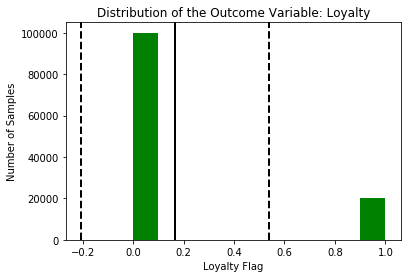

In [17]:
# Create a histogram for dependent varaibe to show the distribution of possible values how common they are.
plt.hist(customers['loyalty'], color='green')

# Setting my labels.
plt.ylabel('Number of Samples')
plt.xlabel('Loyalty Flag')
plt.title('Distribution of the Outcome Variable: Loyalty')

# Visualizing the mean and one standard deviation.
x = customers['loyalty']
plt.axvline(x.mean(), color='black', linestyle='solid', linewidth=2)
plt.axvline(x.mean() + x.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(x.mean() - x.std(), color='black', linestyle='dashed', linewidth=2)

plt.show()

       loyalty
False   100000
True     20000


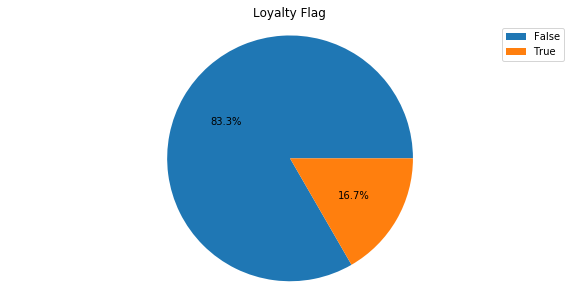

In [18]:
# Creating pie chart to further illustrate distribution of dependent variable.
plt.figure(figsize=(10, 5))

loyalty_counts = pd.DataFrame(customers['loyalty'].value_counts())
print(loyalty_counts)

plt.pie(loyalty_counts, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Loyalty Flag')
plt.legend(loyalty_counts.index)

plt.show()

As shown in each of the two preceding visuals, over 83% of the samples in the dataset are not part of the loyalty program, presenting a potential class imbalance issues in our outcome of intereset. I will use the dominant class rate as a baseline for performance during the modeling process rather than trying to solve for the imbalance by oversampling the minority class or undersampling the majority class.

I could also address class imbalance by issuing probability outputs or to create cost functions for errors.

In [25]:
# Encoding the categorical outcome of interest 'loyalty' data.
customers['loyalty'] = customers['loyalty'].astype('uint8')

In [26]:
customers.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,1,0,31.0,35.0,0
1,65.16,1,1,23.0,61.0,0
2,40.60,0,0,36.0,49.0,0
3,38.01,1,1,47.0,57.0,0
4,22.32,0,1,5.0,39.0,0


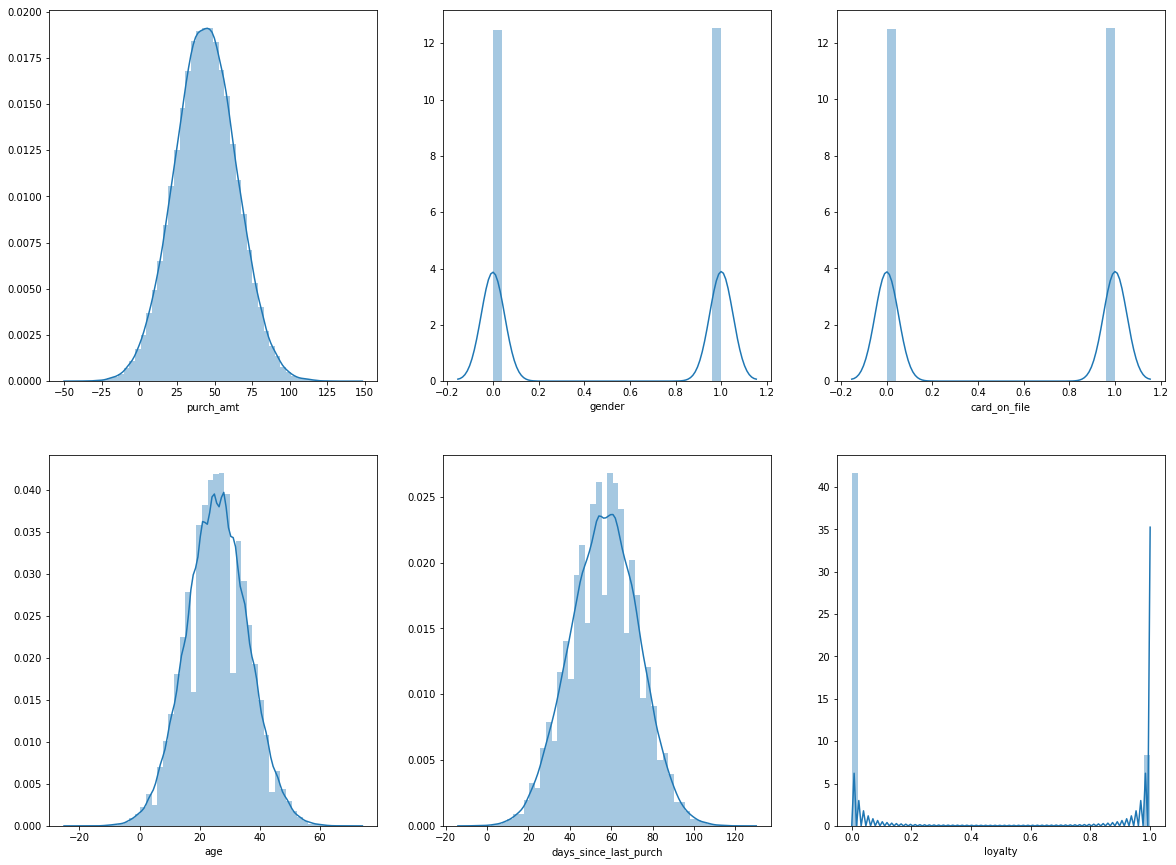

In [29]:
# Univariate distributions of all variables in the dataset by creating a subplot of histograms with distplots.

# Setting the number of subplots and size.
fig, ax = plt.subplots(2,3, figsize=(20, 15))

# Creating distplots for each variable.
sns.distplot(customers['purch_amt'], ax=ax[0][0])
sns.distplot(customers['gender'], ax=ax[0][1])
sns.distplot(customers['card_on_file'], ax=ax[0][2])

sns.distplot(customers['age'], ax=ax[1][0])
sns.distplot(customers.days_since_last_purch, ax=ax[1][1])
sns.distplot(customers['loyalty'], ax=ax[1][2])

plt.show()

The independent variables that were not binarized in previous steps show a normal bell curve distribution. Recall, loyalty is our dependent variable or outcome of interest, which I looked at individually above.

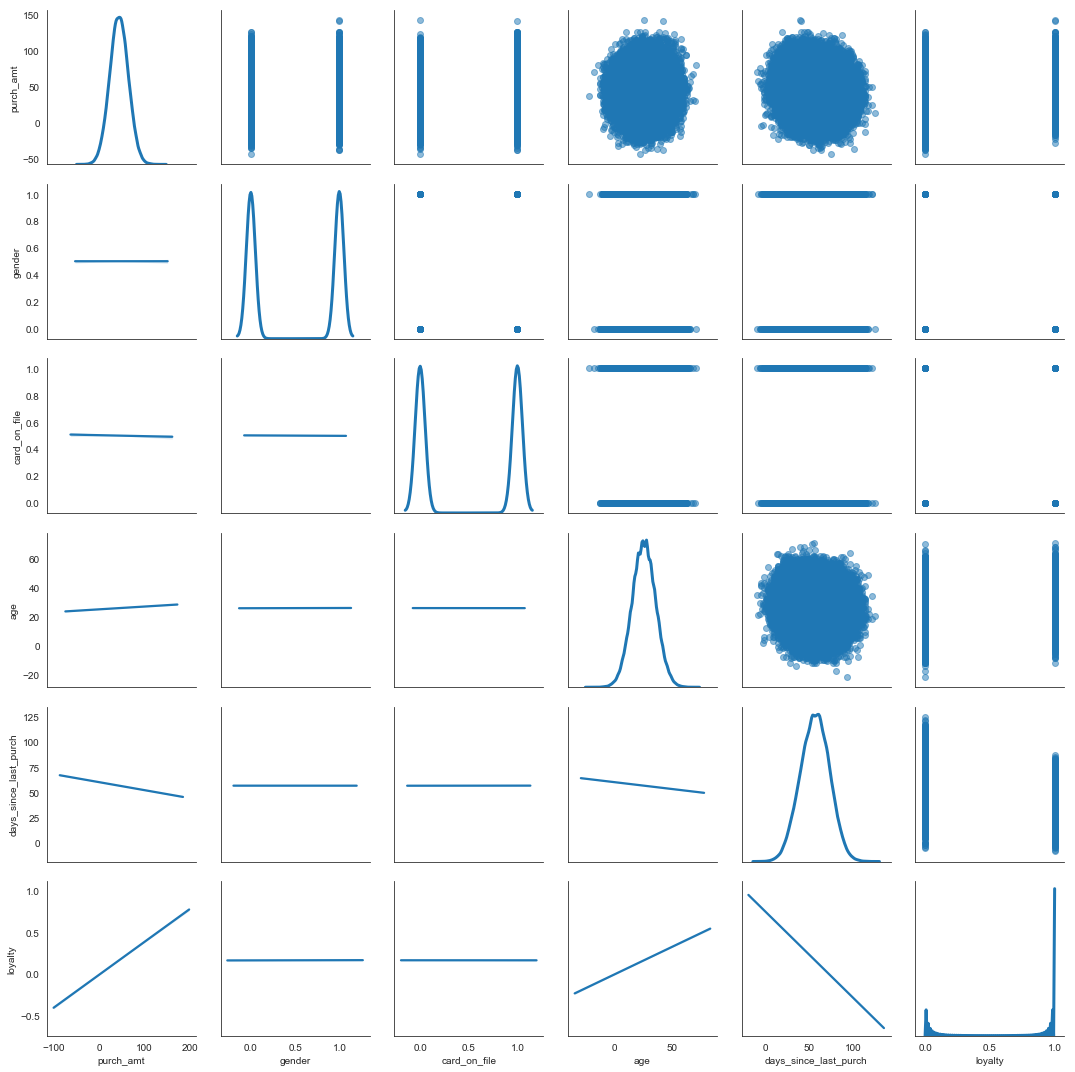

In [30]:
# Create a scatterplot matrix that shows all the bivariate relationships in the dataset.
sns.set_style('white')

g = sns.PairGrid(customers, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

plt.show()

The scatterplot matrix above shows all the bivariate relationships in the dataset in one plot made up of several subplots. 

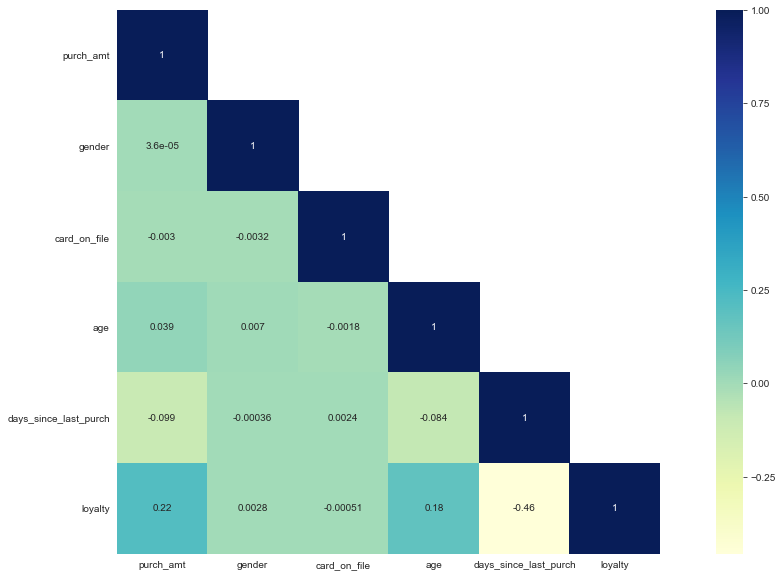

In [32]:
# Create a heatmap with correlation matrix embedded in each square.
plt.figure(figsize=(20,10))

cor_mat = customers.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(customers.corr(), mask=mask, cmap='YlGnBu', square=True, annot=True)

plt.show()

In [33]:
# Create a standalone correlation matrix.
customers.corr()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
purch_amt,1.000000,0.000036,-0.002979,0.038749,-0.098926,0.216203
gender,0.000036,1.000000,-0.003238,0.006985,-0.000355,0.002810
card_on_file,-0.002979,-0.003238,1.000000,-0.001759,0.002351,-0.000514
age,0.038749,0.006985,-0.001759,1.000000,-0.084457,0.180061
days_since_last_purch,-0.098926,-0.000355,0.002351,-0.084457,1.000000,-0.457012
loyalty,0.216203,0.002810,-0.000514,0.180061,-0.457012,1.000000


Heatmaps are a great way to get a quick visual read on a big correlation matrix. Correlations range from -1 (as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (as values in one variable go up, values in the other go up as well).

Based on the views above, it seems that purch_amt and age have the most influence on our outcome of interest.

Gender and card_on_file have little to no relationship with loyalty.

Days_since_last_purch has has the most significant inverse relationship with loyalty.

C:\Users\kenne\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kenne\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


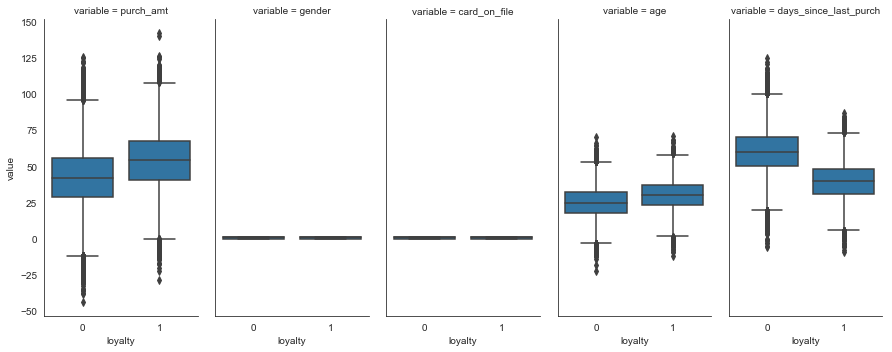

In [34]:
# Restructuring the data to use FacetGrid rather than making a boxplot for each variable individually.
df_long = customers
df_long = pd.melt(df_long, id_vars=['loyalty'])

g = sns.FacetGrid(df_long, col='variable', size=5, aspect=.5)
g = g.map(sns.boxplot, 'loyalty', 'value')

plt.show()

The visual above shows outliders in the relationships between the depdendent variable loyalty and independent variables purch_amt, age and days_since_last_purch.

Below I will look at each of these relationships individually.

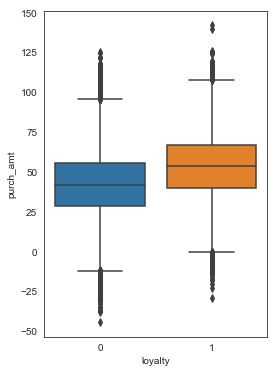

In [35]:
plt.figure(figsize=(4,6))
sns.boxplot('loyalty', 'purch_amt', data=customers)

plt.show()

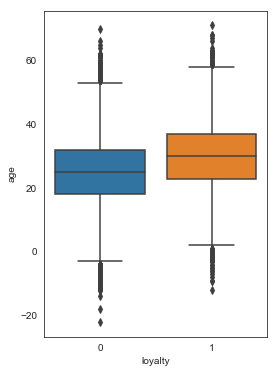

In [36]:
plt.figure(figsize=(4,6))
sns.boxplot('loyalty', 'age', data=customers)

plt.show()

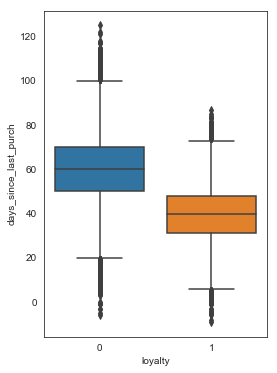

In [37]:
plt.figure(figsize=(4,6))
sns.boxplot('loyalty', 'days_since_last_purch', data=customers)

plt.show()

There are outliers shown in each of these boxplots, but the variance or the distance between interquartile ranges is low. This likely explains the large volume of outliers in some variables.

## Feature Engineering and Selection

In [39]:
# Splitting the data into X and y variables.
X = customers.iloc[:, :5]
y = customers['loyalty']

In [40]:
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
X = StandardScaler().fit_transform(X)

In [41]:
# Dimensionality reduction using Principal Components Analysis.
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X)

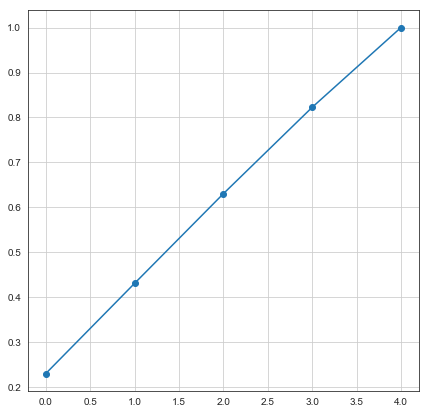

In [44]:
# PLotting to locate the principal components.
plt.figure(figsize=(7,7))
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_), 'o-')
plt.grid()

In [45]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.23018678 0.2006692  0.19945171 0.19221361 0.17747871]


82.1% of the total variance is explained by four of the overall components.

100% of the total variance is explained by all five of the overall components.

## Model Building and Evaluation

In [46]:
# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(84000, 5)
(84000,)
(36000, 5)
(36000,)


### Logistic Regression

When interested in predicting the probability of an outcome where the outcome is categorical (wine will graded as good or bad), logistic regression is used.

In [47]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [48]:
# Print confusion matrix and accuracy rate for evaluation.
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print(lr_conf_matrix)
print(lr_acc_score*100)

[[28810  1219]
 [ 3530  2441]]
86.80833333333334


87% accuracy rate with Logistic Regression.

In [50]:
# Testing the model with cross validation for further evaluation.
cross_val_score(lr, X, y, cv=10)

array([0.86775   , 0.869     , 0.8665    , 0.86808333, 0.86591667,
       0.86858333, 0.87058333, 0.87025   , 0.87041667, 0.87158333])

In [51]:
cross_val_score(lr, X, y, cv=10).mean()

0.8688666666666667

Scores are very consistent, the model does not appear to be overfitting.

### Decision Tree

Decision trees is a process of learning from questions, with each question asked providing more information about the observation under consideration or review.

In [52]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

In [53]:
# Print confusion matrix and accuracy rate for evaluation.
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)

print(dt_conf_matrix)
print(dt_acc_score*100)

[[26309  3720]
 [ 3372  2599]]
80.30000000000001


80% accuracy rate with Decision Tree, does not perform well.

In [54]:
# Testing the model with cross validation for further evaluation.
cross_val_score(dt, X, y, cv=10)

array([0.81266667, 0.80516667, 0.80275   , 0.8065    , 0.80616667,
       0.807     , 0.80733333, 0.80816667, 0.80758333, 0.80475   ])

In [55]:
cross_val_score(dt, X, y, cv=10).mean()

0.8071833333333334

Scores are very consistent, the model does not appear to be overfitting.

### Gradient Boosting Classifier

Gradient boosting is the most common boosting model (a class of ensemble modeling) and can work on any combination of loss function and model type, but most often graident boosting uses decision trees.

In [72]:
gbc = GradientBoostingClassifier(n_estimators=20, 
                                 learning_rate=0.2, 
                                 max_depth=5, 
                                 random_state=5)

gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)

In [73]:
# Print confusion matrix and accuracy rate for evaluation.
gbc_conf_matrix = confusion_matrix(y_test, gbc_predict)
gbc_acc_score = accuracy_score(y_test, gbc_predict)

print(gbc_conf_matrix)
print(gbc_acc_score*100)

[[28641  1388]
 [ 3429  2542]]
86.61944444444445


87% accuracy rate with Gradient Boosting Classifier. The model seems to perform best with a lower number of estimators (set at less than 50.

In [74]:
# Testing the model with cross validation for further evaluation.
cross_val_score(gbc, X, y, cv=10)

array([0.86675   , 0.86566667, 0.86741667, 0.86883333, 0.8645    ,
       0.86875   , 0.8705    , 0.87125   , 0.87041667, 0.86958333])

In [76]:
cross_val_score(gbc, X, y, cv=10).mean()

0.8683666666666667

Scores are relatively consistent, the model does not appear to be overfitting.

### Random Forest Classifier

Random forest models use bagging and randome subspace to generate multiple trees that are different, with each tree in the forest getting a vote on the ouctome for a given observation.

In [88]:
rfc = RandomForestClassifier(n_estimators=300)

rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

In [89]:
# Print confusion matrix and accuracy rate for evaluation.
rfc_accuracy_score = accuracy_score(y_test, rfc_predict)
rfc_confusion_matrix = confusion_matrix(y_test, rfc_predict)

print(rfc_confusion_matrix)
print(rfc_accuracy_score*100)

[[28114  1915]
 [ 3481  2490]]
85.01111111111112


85% accuracy rate with Random Forest Classifer. The model seems to perform best with the number of estimators set at 300.

In [90]:
# Testing the model with cross validation for further evaluation.
cross_val_score(rfc, X, y, cv=10)

array([0.85733333, 0.849     , 0.84516667, 0.84983333, 0.84941667,
       0.85366667, 0.854     , 0.85316667, 0.8525    , 0.85183333])

In [91]:
cross_val_score(rfc, X, y, cv=10).mean()

0.8513249999999999

Scores are relatively consistent, the model does not appear to be overfitting.

### Multi-Layer Perceptron Classifier

Perceptron models form the basis of neural networks and at their core are binary classifiers, minimizing the error from misclassified examples.

In [102]:
mlpc = MLPClassifier(solver='lbfgs',
                     alpha=1e-5, 
                     hidden_layer_sizes=(13,10,5),
                     random_state=1,
                     max_iter=150)

mlpc.fit(X_train, y_train)
mlpc_predict = mlpc.predict(X_test)

In [103]:
# Print confusion matrix and accuracy rate for evaluation.
mlpc_conf_matrix = confusion_matrix(y_test, mlpc_predict)
mlpc_acc_score = accuracy_score(y_test, mlpc_predict)

print(mlpc_conf_matrix)
print(mlpc_acc_score*100)

[[28719  1310]
 [ 3433  2538]]
86.825


87% accuracy rate with Multi-Layer Perceptron Classifer. The model seems to perform best with the number of max interations set at 150.

In [104]:
# Testing the model with cross validation for further evaluation.
cross_val_score(mlpc, X, y, cv=10)

array([0.869     , 0.86716667, 0.86775   , 0.87041667, 0.86433333,
       0.86908333, 0.87      , 0.86983333, 0.87008333, 0.8695    ])

In [105]:
cross_val_score(mlpc, X, y, cv=10).mean()

0.8687166666666666

Scores are relatively consistent, the model does not appear to be overfitting.

### Support Vector Machine Classifier

Commonly used in classification problems, when given a set of training data marked as belonging to one of two categories (Loyalty program member True or False) this algorithm builds a model that assigns new examples to one category or the other.

In [107]:
svc_rbf = SVC(kernel='rbf')

svc_rbf.fit(X_train, y_train)
svc_rbf_predict = svc_rbf.predict(X_test)

In [108]:
# Print confusion matrix and accuracy rate for evaluation.
svc_rbf_conf_matrix = confusion_matrix(y_test, svc_rbf_predict)
svc_rbf_acc_score = accuracy_score(y_test, svc_rbf_predict)

print(svc_rbf_conf_matrix)
print(svc_rbf_acc_score*100)

[[29204   825]
 [ 3987  1984]]
86.63333333333333


87% accuracy rate using Support Vector Machine Classifer with a RBF Kernel.

In [112]:
# Testing the model with cross validation for further evaluation.
cross_val_score(svc_rbf, X, y, cv=10)

array([0.86608333, 0.866     , 0.86508333, 0.869     , 0.862     ,
       0.86866667, 0.86808333, 0.86675   , 0.86725   , 0.86741667])

In [114]:
cross_val_score(svc_rbf, X, y, cv=10).mean()

0.8666333333333334

Scores are relatively consistent, the model does not appear to be overfitting. The model seems to perform best with the default RBF kernel.

### K-Nearest Neighbors Classifer

A type of similarity model, looks at several nearest neighbors rather than just one and each neighbor gets to vote on the predicted outcome.

In [132]:
knnc = KNeighborsClassifier(n_neighbors=50)

knnc.fit(X_train, y_train)
knnc_predict = knnc.predict(X_test)

In [133]:
# Print confusion matrix and accuracy rate for evaluation.
knnc_conf_matrix = confusion_matrix(y_test, knnc_predict)
knnc_acc_score = accuracy_score(y_test, knnc_predict)

print(knnc_conf_matrix)
print(knnc_acc_score*100)

[[28868  1161]
 [ 3636  2335]]
86.675


87% accuracy rate using K-Nearest Neighbors Classifier.

In [134]:
# Testing the model with cross validation for further evaluation.
cross_val_score(knnc, X, y, cv=10)

array([0.86566667, 0.86591667, 0.86633333, 0.86591667, 0.86283333,
       0.8675    , 0.86875   , 0.86583333, 0.86766667, 0.86725   ])

In [135]:
cross_val_score(knnc, X, y, cv=10).mean()

0.8663666666666666

Scores are relatively consistent, the model does not appear to be overfitting. The model seems to perform best with the number of neighbors set at 50.

More than one algorithm produced similar accuracy rates at a peak of nearly 87%.

This includes Logistic Regression (86.8%), Gradient Boosting Classifier (86.6%), Multi-Layer Perceptron Classifier (86.8%), Support Vector Machine Classifier with a RBF Kernel (86.6%) and K-Nearest Neighbors Classifier (86.7%).

SVM took longer to run than the other top performers. Additional fine tuning of hyper-parameters and perhaps additional variables could help strengthen one or more of these models further. The results show that it is possible for us to predict the number of customers who are likely to join our loyalty program.